### World War Two Aerial Bombing Campaigns

This dataset shows the date, conflict, geographic location, and other data elements of aerial warfare from 1939 to 1945. In this project I will examine the patterns of these bombing campaigns in terms of which countries were involved, the locations from which flights took off, and more.

In [40]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# create initial dataframe from csv file

bomb = pd.read_csv('C:/Users/Lenovo/Desktop/operations.csv')

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
# convert date column to datetime

bomb["Mission Date"] = pd.to_datetime(bomb["Mission Date"])

In [43]:
# replace NaN values with spaces

bomb1 = bomb.replace(np.nan, '', regex=True)

In [44]:
# create dataframe sorted by date

bomb_date = bomb1.sort_values("Mission Date")

### Frequency of Raids

First of all, we can examine the frequency of bombing raids using a histogram. As this shows, the number of bombing raids is relatively low and consistent until around Spring/Summer 1944, when there is a steep rise, culminating in a peak in the Spring of 1945. Among other things, this reflects the achievement of aerial superiority by the allies in the last year of the war, allowing them to bomb German targets with increasing impunity.

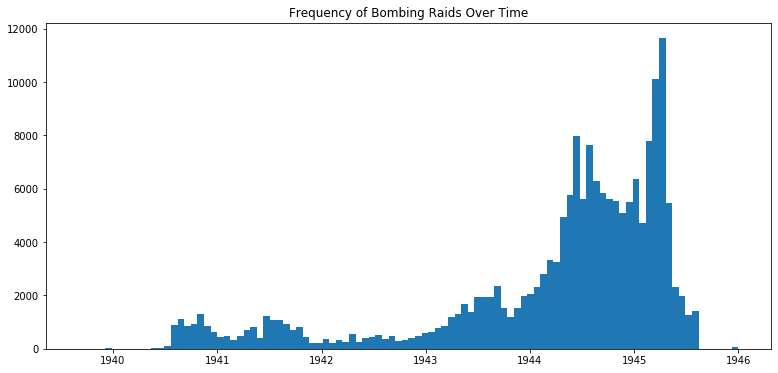

Text(0.5, 1.0, 'Frequency of Bombing Raids Over Time')

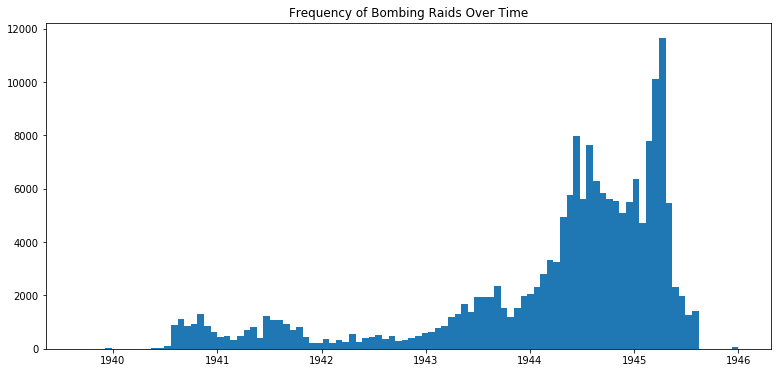

In [138]:
# create date histogram

plt.hist(bomb_date["Mission Date"], bins=100)
plt.gcf().set_size_inches(13, 6)
plt.title("Frequency of Bombing Raids Over Time")

In [116]:
# Create a dataframe grouped by country

bomb_group = bomb_date.groupby("Country", as_index=False)

In [128]:
# Inspect which countries are listed in "Country" column

bomb_date["Country"].unique()

array(['GREAT BRITAIN', 'SOUTH AFRICA', 'USA', '', 'AUSTRALIA',
       'NEW ZEALAND'], dtype=object)

### Raids by Individual Country

A function can be created which takes as an input the name of one of the countries in the "Country" column ("GREAT BRITAIN", "SOUTH AFRICA", "USA", "AUSTRALIA", and "NEW ZEALAND") and outputs a histogram showing the frequency of raids by that country over time. This can be used to compare the frequency of British versus American raids, for example, which reveals that the frequency of British raids peaked in late 1941/early 1942, with another spike at the end of the war, while American raids were of course non-existent in 1941/early 1942 (the US did not join the war until late 1941), and can be seen to grow steadily from 1943 onwards, also with a sharp rise at the end of the war.

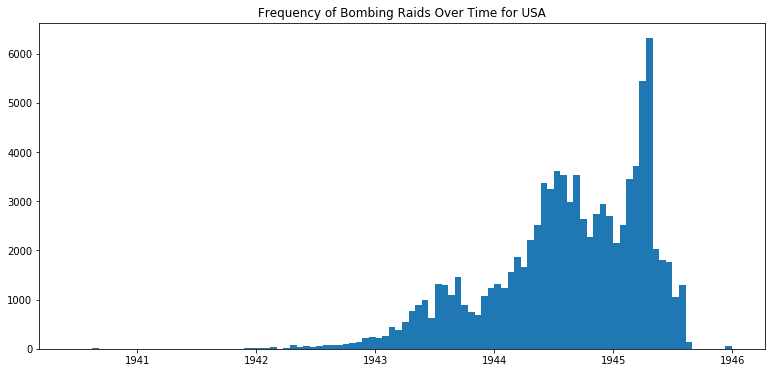

In [137]:
# Create function to show raids for individual countries over time

def raids_per_country(x):
    if x in bomb_date["Country"].values:
        temp_df = bomb_date[bomb_date["Country"] == x]
        plt.hist(temp_df["Mission Date"], bins=100)
        plt.gcf().set_size_inches(13, 6)
        plt.title("Frequency of Bombing Raids Over Time for " + x)
    else:
        print("Entry not recognized")
        
raids_per_country("USA")